In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [29]:
data_df = pd.read_table('census+income/adult.data', delimiter=',', header=None)

In [30]:
data_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [31]:
test_df = pd.read_csv('census+income/adult.test', header=None)

In [32]:
test_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


age
workclass
fnlwgt
education
education-num
marital-status
occupation
relationship
race
sex
capital-gain
capital-loss
hours-per-week
native-country

In [33]:
col_str = 'age workclass fnlwgt education education-num marital-status occupation relationship race sex capital-gain capital-loss hours-per-week native-country above-50k'
columns = col_str.split(' ')

In [34]:
columns

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'above-50k']

In [35]:
data_df.columns = columns

In [36]:
data_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,above-50k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [37]:
test_df = pd.read_csv('census+income/adult.test', header = None)

In [38]:
test_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [39]:
test_df.columns = columns

In [40]:
test_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,above-50k
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [41]:
ddf = data_df[['education', 'above-50k']]
tdf = test_df[['education', 'above-50k']]

## Checking the values in 'above-50k'

In [42]:
ddf['above-50k'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [43]:
tdf['above-50k'].unique()

array([' <=50K.', ' >50K.'], dtype=object)

In [44]:
boolify = {' <=50K': 0, ' >50K': 1}
ddf = ddf.replace({'above-50k': boolify})

In [45]:
boolify = {' <=50K.': 0, ' >50K.': 1}
tdf = tdf.replace({'above-50k': boolify})

In [46]:
ddf.head()

,education,above-50k
0,Bachelors,0
1,Bachelors,0
2,HS-grad,0
3,11th,0
4,Bachelors,0


In [47]:
tdf.head()

,education,above-50k
0,11th,0
1,HS-grad,0
2,Assoc-acdm,1
3,Some-college,1
4,Some-college,0


## Encoding the 'education' column

## Visualizing data

In [ ]:
#saving this for later. I got this from the matplotlib.pyplot api and previously used it in a _

Pie Charts for salary

In [52]:
ddf['above-50k'].value_counts()

0    24720
1     7841
Name: above-50k, dtype: int64

In [51]:
tdf['above-50k'].value_counts()

0    12435
1     3846
Name: above-50k, dtype: int64

([<matplotlib.patches.Wedge at 0x1fa2149a2e0>,
 [Text(-0.7999477838977984, 0.7550387692277803, '<= 50k'),
  Text(0.7999477838977981, -0.7550387692277808, '> 50k')])

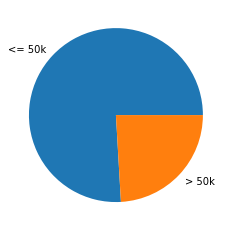

In [55]:
plt.pie(ddf['above-50k'].value_counts(), labels = ['<= 50k', '> 50k'])

([<matplotlib.patches.Wedge at 0x1fa214e12e0>,
 [Text(-0.8107361809803564, 0.7434425632484241, '<= 50k'),
  Text(0.8107362157834136, -0.7434425252951237, '> 50k')])

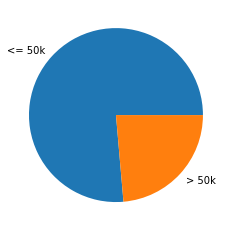

In [56]:
plt.pie(tdf['above-50k'].value_counts(), labels = ['<= 50k', '> 50k'])

Histograms for education

In [59]:
ddf['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [73]:
ddf['education'].value_counts().index

Index([' HS-grad', ' Some-college', ' Bachelors', ' Masters', ' Assoc-voc',
       ' 11th', ' Assoc-acdm', ' 10th', ' 7th-8th', ' Prof-school', ' 9th',
       ' 12th', ' Doctorate', ' 5th-6th', ' 1st-4th', ' Preschool'],
      dtype='object')

<BarContainer object of 16 artists>

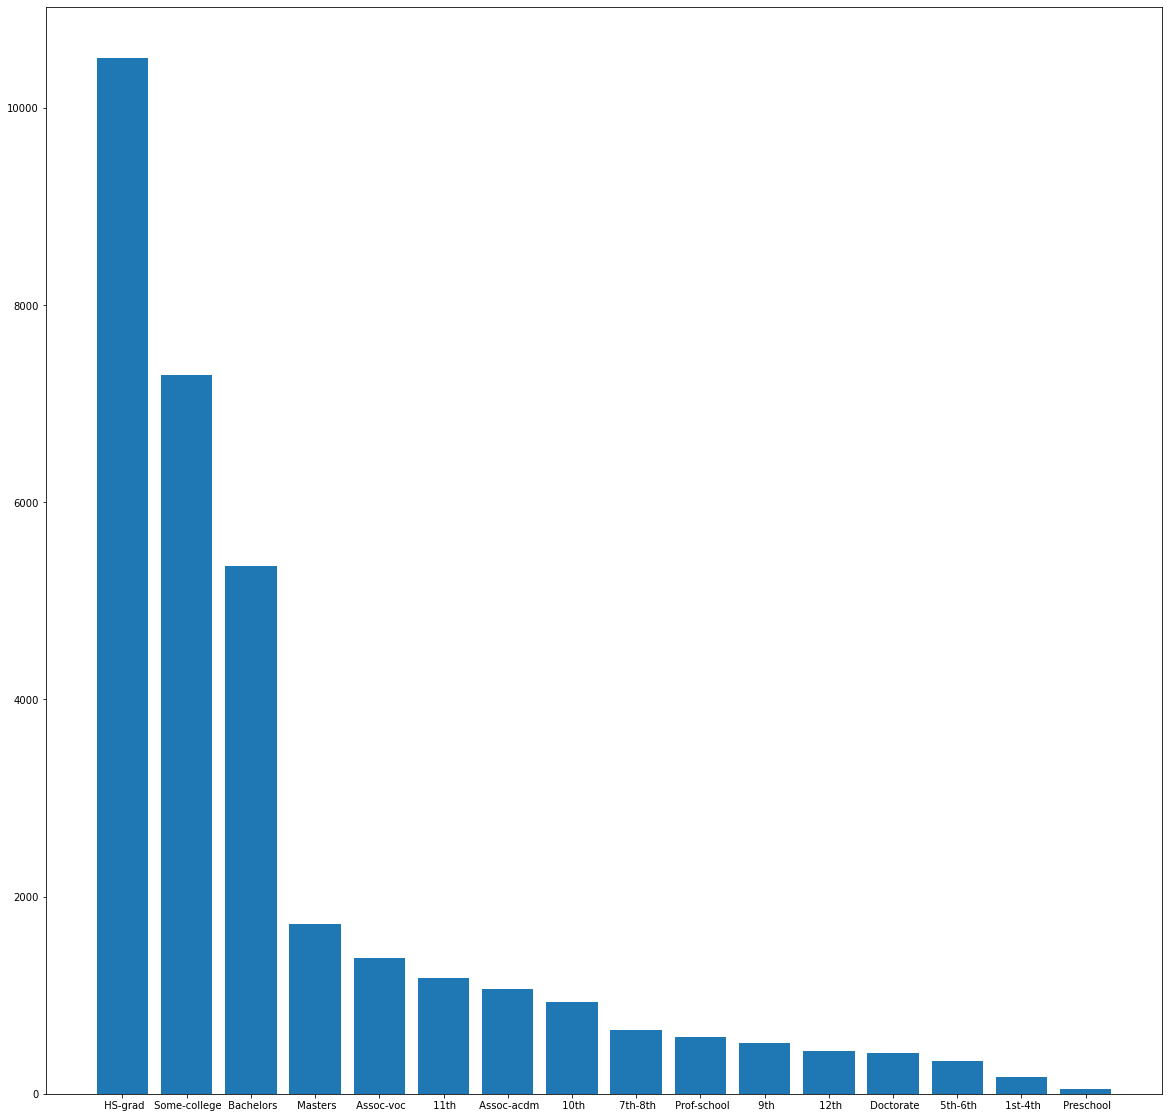

In [74]:
plt.figure(figsize = (20,20))
plt.bar(x = ddf['education'].value_counts().index, height =  ddf['education'].value_counts().values)

Histograms for _ and _

<BarContainer object of 16 artists>

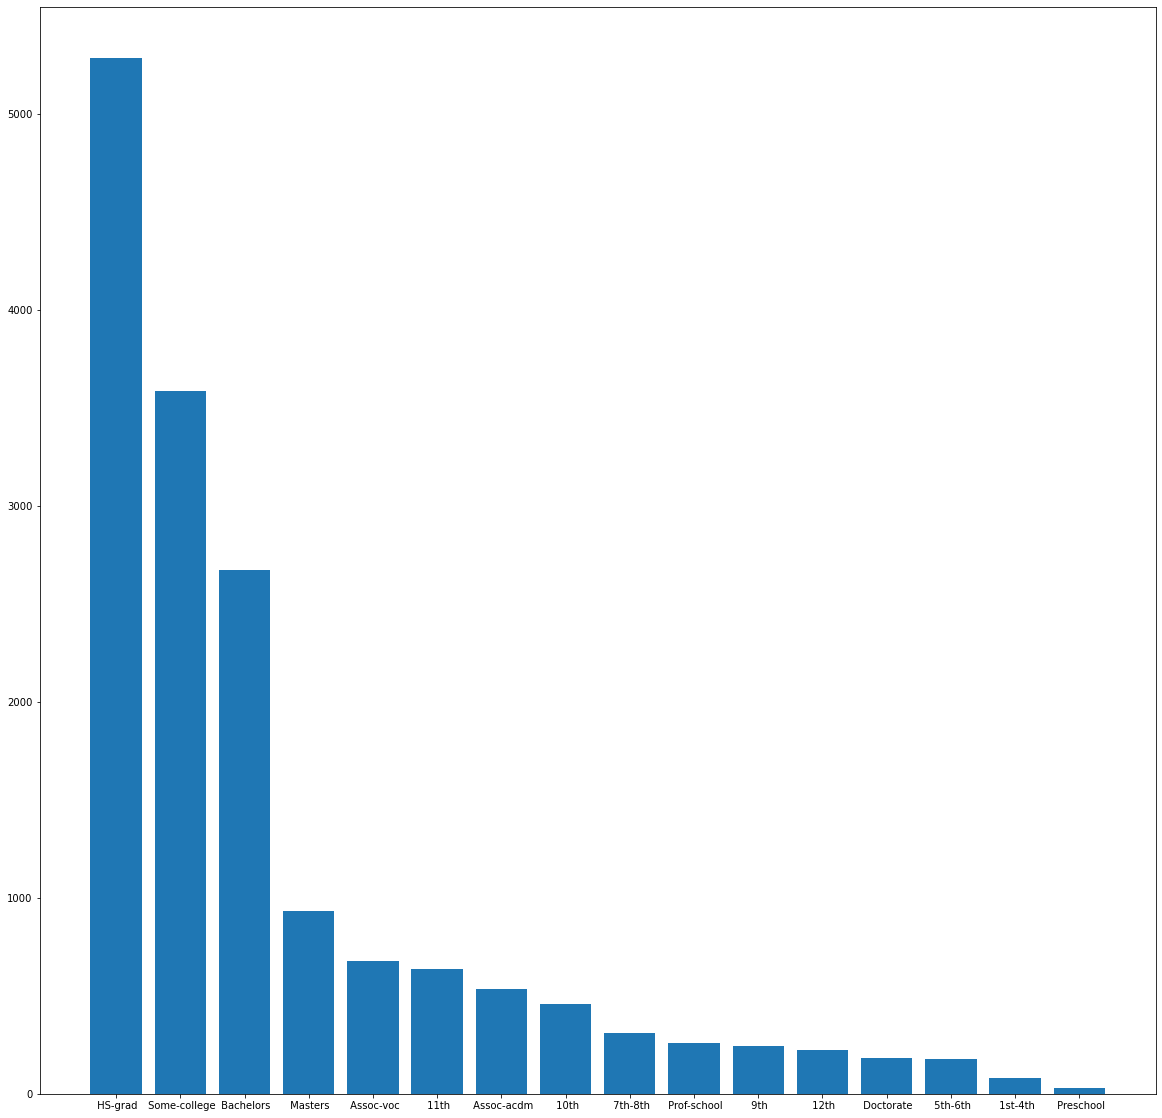

In [75]:
plt.figure(figsize = (20,20))
plt.bar(x = tdf['education'].value_counts().index, height =  tdf['education'].value_counts())

## Encoding

## Correlations

## Modeling

### Classification

### Clustering